Links zu Dokumentationen/Tutorials für IPython/Python/numpy/matplotlib/git sowie die Sourcodes findet ihr im [GitHub Repo](https://github.com/BerndSchwarzenbacher/numdiff).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
from math import sqrt
%matplotlib inline
pylab.rcParams['figure.figsize'] = (5.0, 5.0)

In [2]:
def plotStabBereich(g):
    delta = 0.1;
    re = np.arange(-8, 8, delta)
    im = np.arange(-8, 8, delta)
    Re, Im = np.meshgrid(re, im)

    gfunc = np.vectorize(g)
    plt.figure()
    c1 = plt.contourf(Re, Im, (abs(gfunc(Re+1j*Im))), [0, 1], colors = ('b', 'r' ), extend='max')
    c1.cmap.set_over('red')
    plt.grid()
    plt.colorbar(c1)
    plt.show()

In [3]:
def plotStabBereichRK(A, b):
    n = b.size
    plotStabBereich(lambda z:
        (1 + z * np.dot(np.dot(b.T, np.linalg.inv(np.eye(n) - z * A)), np.ones(n))))           

###Expliziter Euler

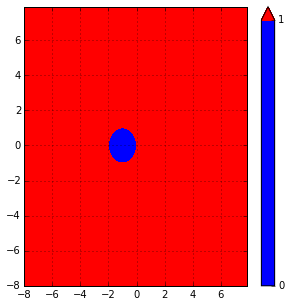

In [4]:
A = np.array([[0]])
b = np.array([1])
plotStabBereichRK(A, b)

###Impliziter Euler

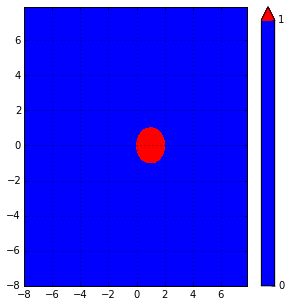

In [5]:
A = np.array([[1]])
b = np.array([1])
plotStabBereichRK(A, b)

###Verbesserter Euler

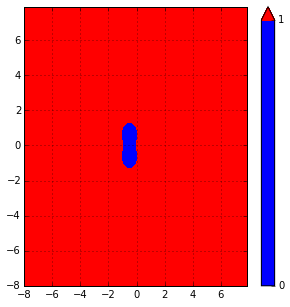

In [6]:
A = np.array([[0, 0], [1, 0]])
b = np.array([0, 1])
plotStabBereichRK(A, b)

###Heun

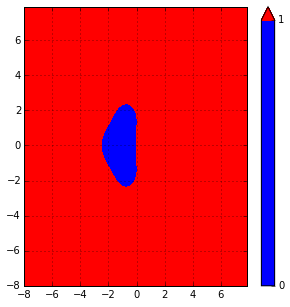

In [7]:
A = np.array([[0, 0, 0], [1/3, 0, 0], [0, 2/3, 0]])
b = np.array([1/4, 0, 3/4])
plotStabBereichRK(A, b)

###klassische RK

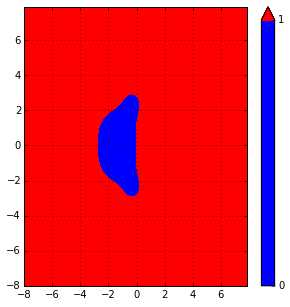

In [8]:
A = np.array([[0, 0, 0, 0], [0.5, 0, 0, 0], [0, 0.5, 0, 0], [0, 0, 1, 0]])
b = np.array([1/6, 2/6, 2/6, 1/6])
plotStabBereichRK(A, b)

###Gauss2

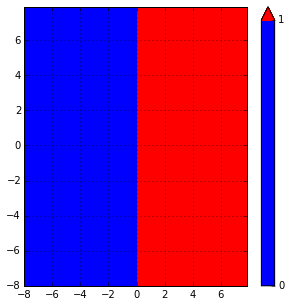

In [9]:
A = np.array([[1/4, 1/4 - sqrt(3)/6], [1/4 + sqrt(3)/6, 1/4]])
b = np.array([0.5, 0.5])
plotStabBereichRK(A, b)

###Gauss-Radau2

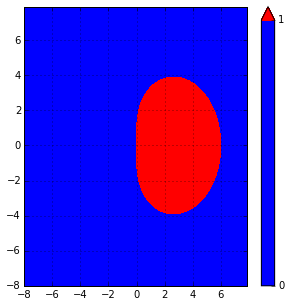

In [10]:
A = np.array([[1/4, -1/4], [1/4, 5/12]])
b = np.array([1/4, 3/4])
plotStabBereichRK(A, b)